In [1]:
import pandas as pd
df = pd.read_csv('Diabetes Classification.csv')
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [3]:
print('No of rows: ',df.shape[0])
print('No of columns: ',df.shape[1])

No of rows:  128
No of columns:  11


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [10]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [12]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')

#### Univariate Data Analysis

Diagnosis
No     97
Yes    31
Name: count, dtype: int64


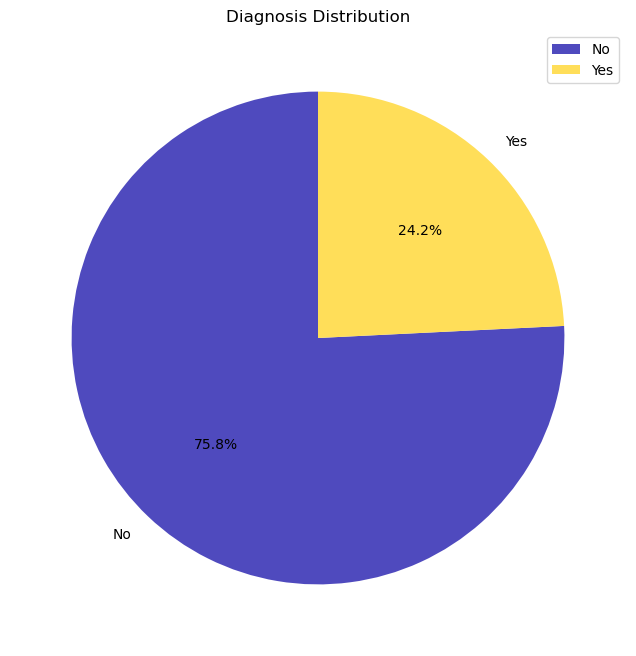

In [15]:
import matplotlib.pyplot as plt

# Count diagnosed and not diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()
print(diagnosis_counts)

# Labels for the pie chart
labels = ['No', 'Yes']

# Plotting pie chart
plt.figure(figsize=(8,8))
plt.pie(diagnosis_counts, labels=labels, autopct='%1.1f%%', colors=['#4F4ABE', '#FFDE59'], startangle=90)
plt.legend()
plt.title('Diagnosis Distribution')
plt.show()

Age


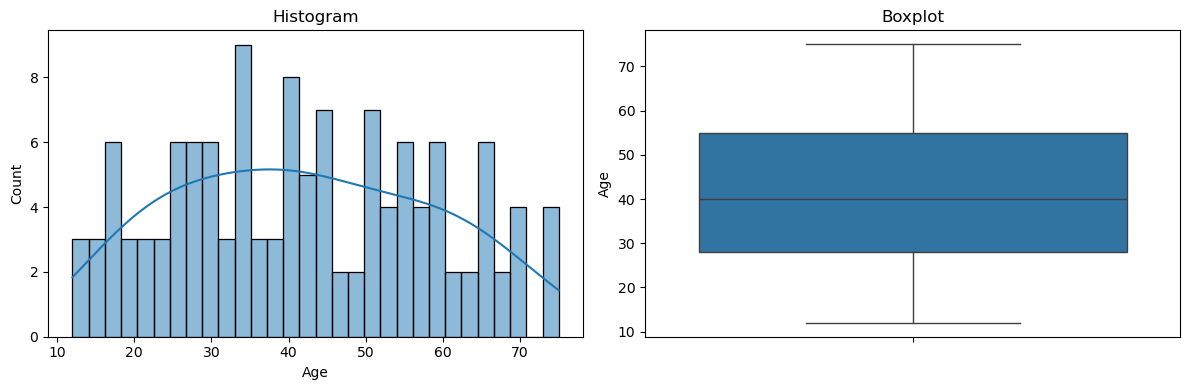

BMI


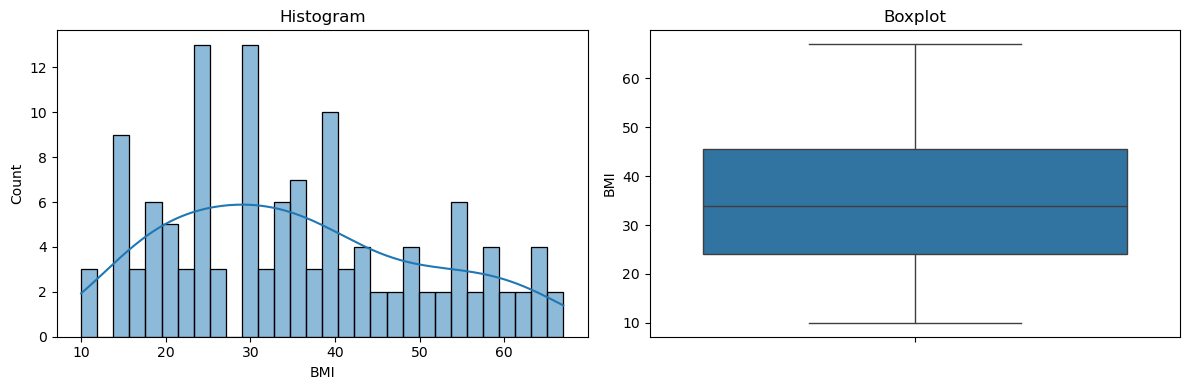

FBS


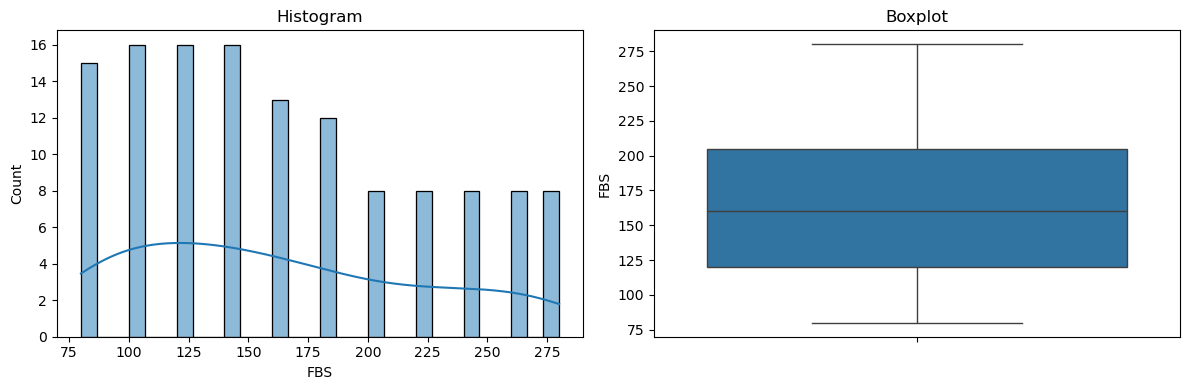

HbA1c


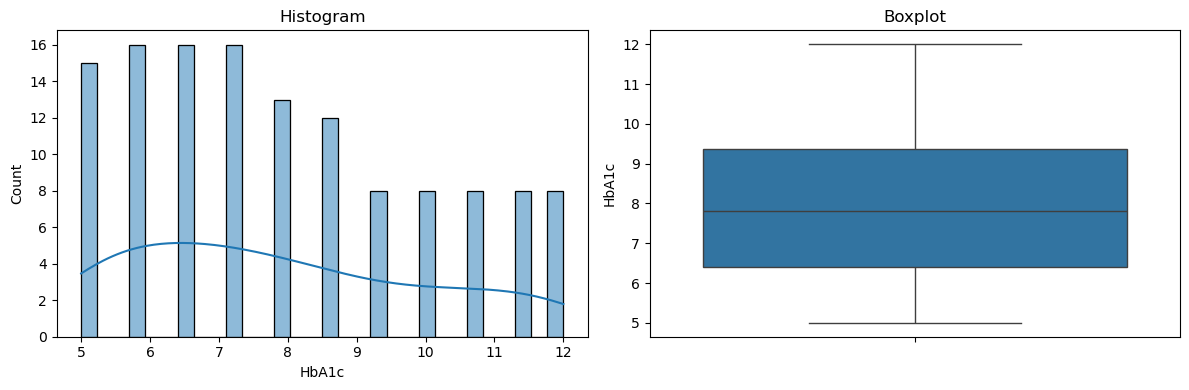

In [27]:
import seaborn as sns

def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[1], showfliers=True, flierprops={'marker': 'o', 'color': 'red', 'alpha': 0.5})
    ax[1].set_title('Boxplot')  

    plt.tight_layout()
    print(variable)
    plt.show()

for i in df.columns:
    plots(df ,i)

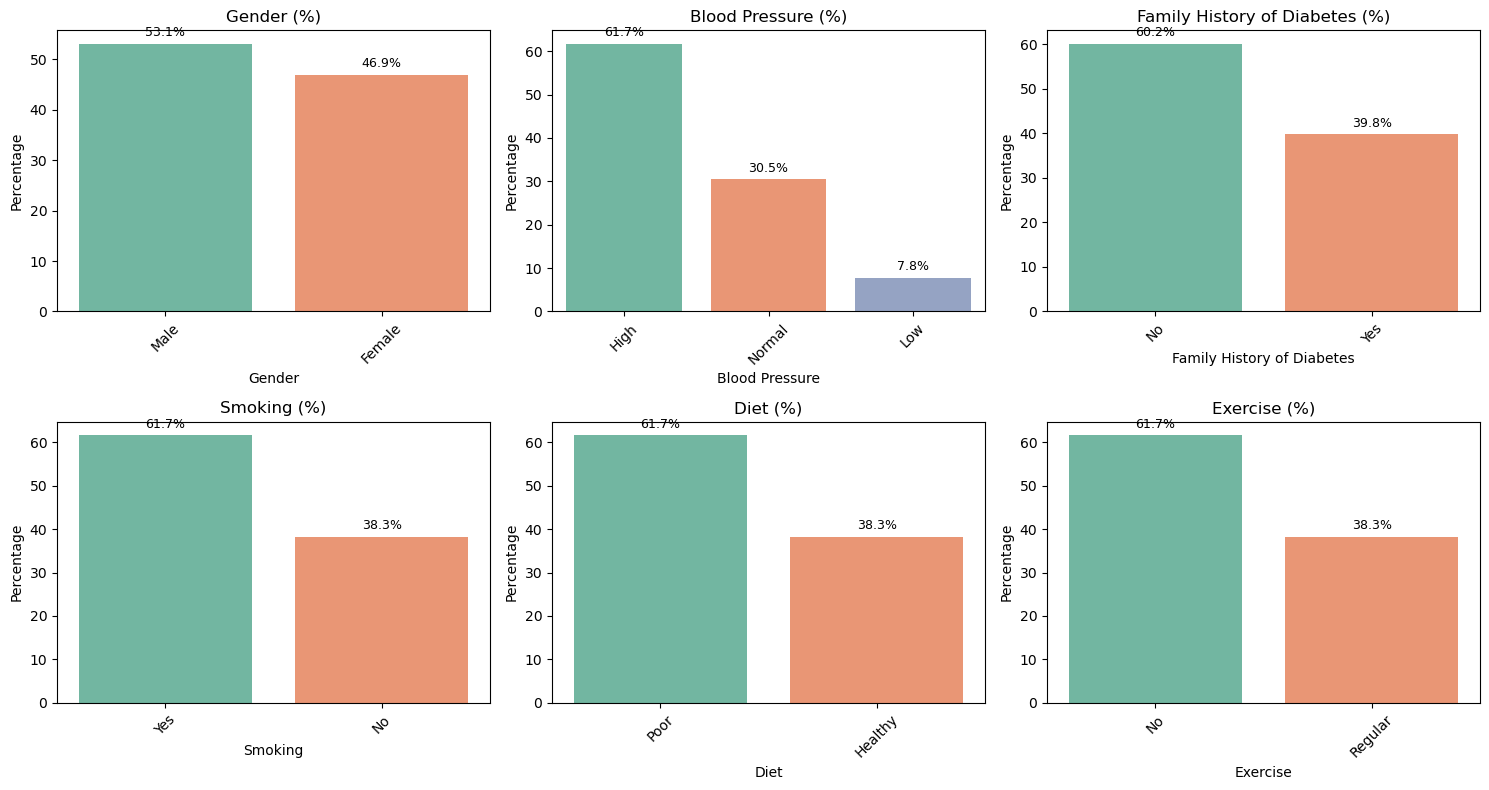

In [53]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = [
    "Gender", 
    "Blood Pressure", 
    "Family History of Diabetes", 
    "Smoking", 
    "Diet", 
    "Exercise"
]

def univariate_categorical_analysis(df, cat_vars, plots_per_row=3):
    total = len(cat_vars)
    rows = math.ceil(total / plots_per_row)
    
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 5, rows * 4))
    axes = axes.flatten()  # flatten in case of multiple rows

    for idx, var in enumerate(cat_vars):
        ax = axes[idx]
        percentage = df[var].value_counts(normalize=True) * 100
        
        sns.barplot(x=percentage.index, y=percentage.values, hue=percentage.index,
                    palette='Set2', dodge=False, legend=False, ax=ax)
        ax.set_title(f"{var} (%)")
        ax.set_ylabel("Percentage")
        ax.set_xlabel(var)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)

        # Add percentage labels
        for i, v in enumerate(percentage.values):
            ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)

    # Remove any unused axes
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Run the function
univariate_categorical_analysis(df, categorical_vars)

#### Bivariate Data Analysis

In [92]:
def bar_chart(feature):
    Diabetic = df[df["Diagnosis"] == "Yes"][feature].value_counts()
    NonDiabetic = df[df["Diagnosis"] == "No"][feature].value_counts()

    # Combine and normalize
    dff = pd.DataFrame([Diabetic, NonDiabetic])
    dff.index = ['Diabetic', 'Without Diabetes']
    dff_percent = dff.div(dff.sum(axis=0), axis=1) * 100

    # Plot
    ax = dff_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
    ax.set_title(f"Percentage Distribution of {feature}")
    ax.set_ylabel("Percentage (%)")
    ax.legend(title=feature)

    # Add percentage labels inside the bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 5:  # Only label if big enough for readability
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{height:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=10,
                    color='black'
                )

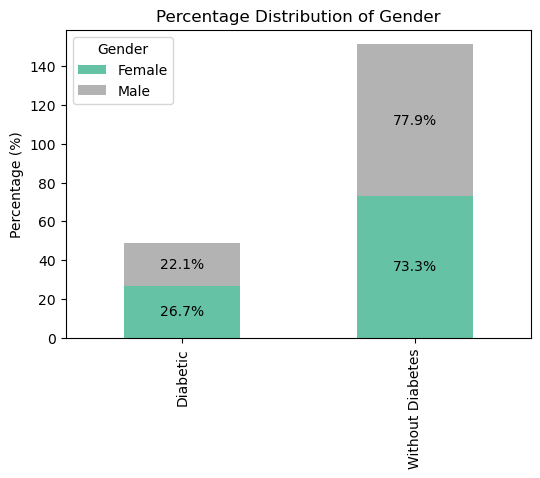

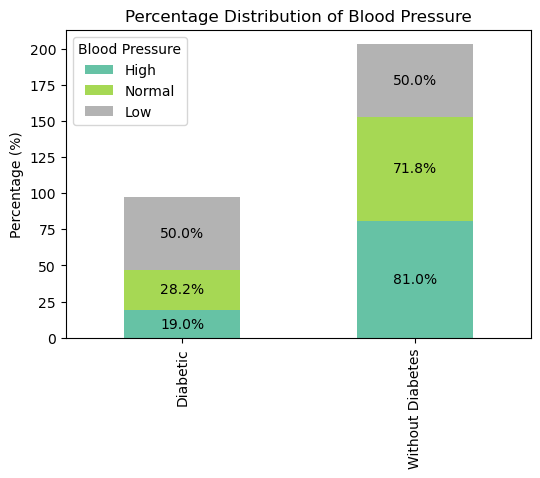

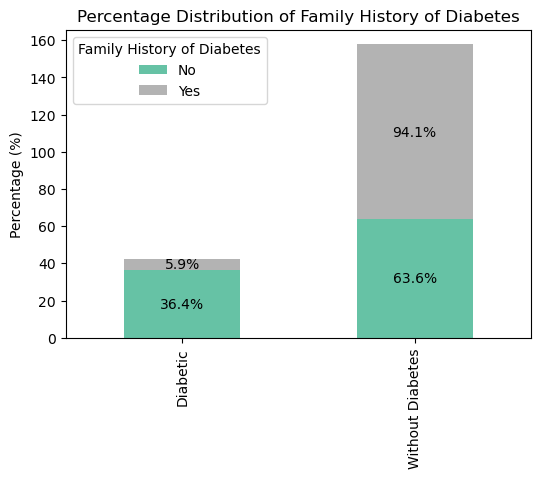

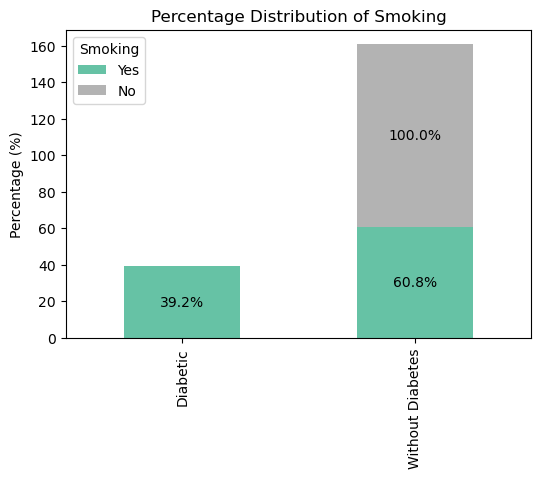

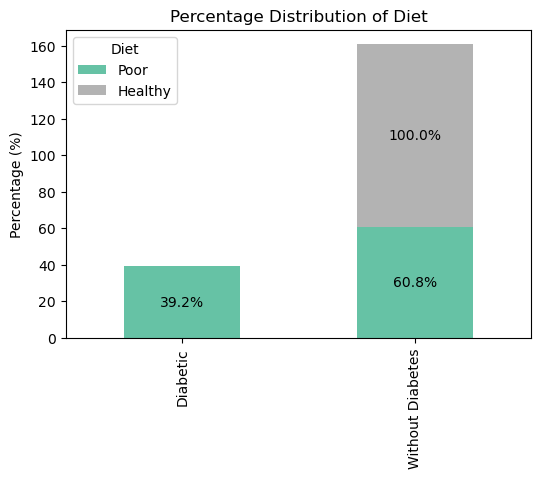

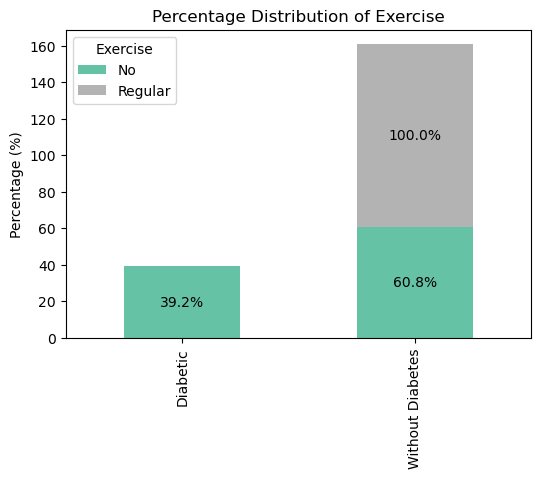

In [96]:
bar_chart("Gender")
bar_chart("Blood Pressure")
bar_chart("Family History of Diabetes")
bar_chart("Smoking")
bar_chart("Diet")
bar_chart("Exercise")

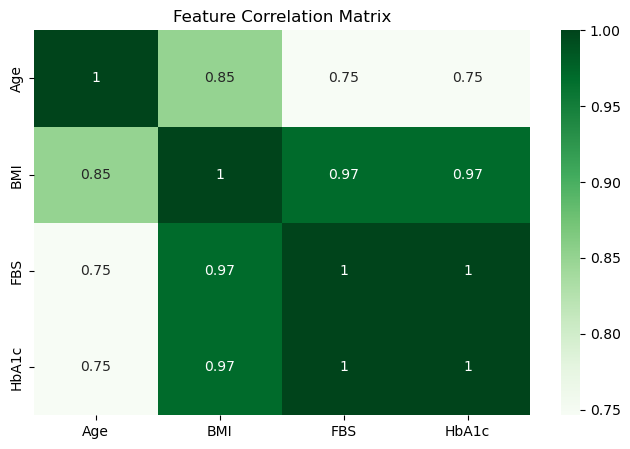

In [98]:
rem_cols = ["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise","Diagnosis"]

df_cor = df.drop(rem_cols,axis=1)

# Compute the correlation matrix
corr_matrix = df_cor.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.title("Feature Correlation Matrix")
plt.show()

### Scaling numeric features

In [101]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age', 'BMI', 'FBS', 'HbA1c']

# Create the scaler (StandardScaler)
scaler = StandardScaler()

# Scale the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df.head())  

        Age  Gender       BMI Blood Pressure       FBS     HbA1c  \
0  0.177576    Male -0.694184         Normal -1.023182 -1.023182   
1  0.775725  Female -0.359133           High -0.695764 -0.695764   
2  1.373875    Male -0.024082           High -0.368345 -0.368345   
3  1.972025  Female  0.310969           High -0.040927 -0.040927   
4 -0.121499    Male -1.029235         Normal -1.350600 -1.350600   

  Family History of Diabetes Smoking     Diet Exercise Diagnosis  
0                         No      No  Healthy  Regular        No  
1                        Yes     Yes     Poor       No       Yes  
2                        Yes     Yes     Poor       No       Yes  
3                        Yes     Yes     Poor       No       Yes  
4                         No      No  Healthy  Regular        No  


### Categorical variable encoding

In [104]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop="first")

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(df[["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise"]])

# Convert result to DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

print("\nOne-Hot Encoded Data:")
print(encoded_df.head())


One-Hot Encoded Data:
   Gender_Male  Blood Pressure_Low  Blood Pressure_Normal  \
0          1.0                 0.0                    1.0   
1          0.0                 0.0                    0.0   
2          1.0                 0.0                    0.0   
3          0.0                 0.0                    0.0   
4          1.0                 0.0                    1.0   

   Family History of Diabetes_Yes  Smoking_Yes  Diet_Poor  Exercise_Regular  
0                             0.0          0.0        0.0               1.0  
1                             1.0          1.0        1.0               0.0  
2                             1.0          1.0        1.0               0.0  
3                             1.0          1.0        1.0               0.0  
4                             0.0          0.0        0.0               1.0  


In [106]:
# Drop original categorical columns from df
df = df.drop(columns=["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise"])

# Concatenate df and encoded_df
df = pd.concat([df, encoded_df], axis=1)

# Verify the merged DataFrame
print(df.head())

        Age       BMI       FBS     HbA1c Diagnosis  Gender_Male  \
0  0.177576 -0.694184 -1.023182 -1.023182        No          1.0   
1  0.775725 -0.359133 -0.695764 -0.695764       Yes          0.0   
2  1.373875 -0.024082 -0.368345 -0.368345       Yes          1.0   
3  1.972025  0.310969 -0.040927 -0.040927       Yes          0.0   
4 -0.121499 -1.029235 -1.350600 -1.350600        No          1.0   

   Blood Pressure_Low  Blood Pressure_Normal  Family History of Diabetes_Yes  \
0                 0.0                    1.0                             0.0   
1                 0.0                    0.0                             1.0   
2                 0.0                    0.0                             1.0   
3                 0.0                    0.0                             1.0   
4                 0.0                    1.0                             0.0   

   Smoking_Yes  Diet_Poor  Exercise_Regular  
0          0.0        0.0               1.0  
1          1.0    

### Build Models

In [109]:
df.isnull().sum()

Age                               0
BMI                               0
FBS                               0
HbA1c                             0
Diagnosis                         0
Gender_Male                       0
Blood Pressure_Low                0
Blood Pressure_Normal             0
Family History of Diabetes_Yes    0
Smoking_Yes                       0
Diet_Poor                         0
Exercise_Regular                  0
dtype: int64

In [111]:
!pip install xgboost
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [113]:
# Encode target
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



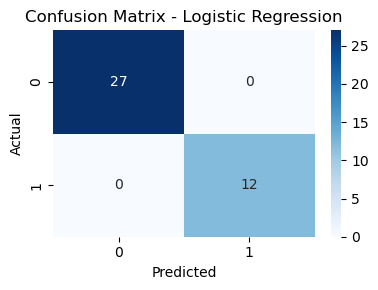


Model: Decision Tree
Accuracy: 0.95
Precision: 0.86
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.86      1.00      0.92        12

    accuracy                           0.95        39
   macro avg       0.93      0.96      0.94        39
weighted avg       0.96      0.95      0.95        39



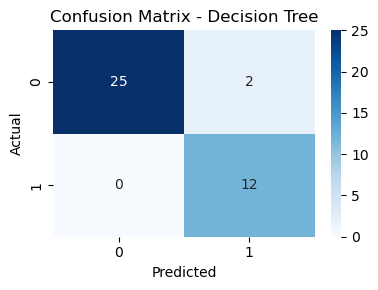


Model: KNN
Accuracy: 0.79
Precision: 0.70
Recall: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.70      0.58      0.64        12

    accuracy                           0.79        39
   macro avg       0.76      0.74      0.75        39
weighted avg       0.79      0.79      0.79        39



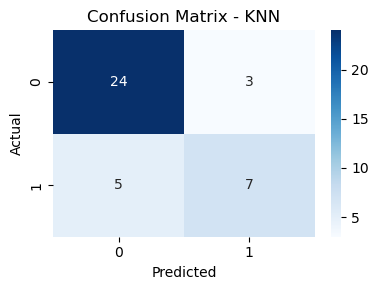


Model: SVC
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



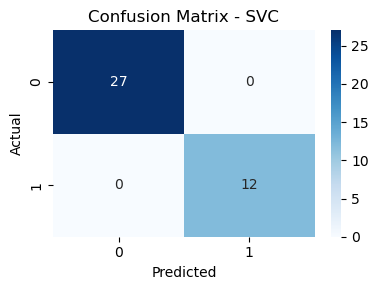


Model: XGBoost
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



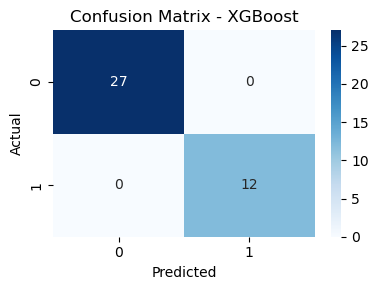

In [117]:
for name, model in trained_models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()